# Introduction

## Tentang Dataset

Dataset Uber dan Lyft Boston, MA berasal dari Kaggle dan memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. 

Meski mengandung banyak nilai NA, tetapi data ini sangat baik digunakan bagi pemula dengan melihat pola antara prediktor seperti harga dan jam menggunakan model Linear Regression.

## Tujuan

Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:\
● Mampu memahami konsep regression dengan Linear Regression\
● Mampu mempersiapkan data untuk digunakan dalam model Linear Regression\
● Mampu mengimplementasikan Linear Regression untuk membuat prediksi


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pickle
%matplotlib inline

from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, auc
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Data Loading

In [2]:
df = pd.read_csv('C:/Users/DELL/PycharmProjects/FinalProject_PYTN/dataset/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Cleaning

In [3]:
#melihat dimensi data
df.shape

(693071, 57)

dari output diatas, terlihat bahwa data ini berjumlah 69.3071 baris dan 57 kolom. lalu, akan dilanjutkan untuk melihat tipe data pada kolom.

In [4]:
#melihat tipe data pada kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

dari output diatas, terlihat bahwa kolom "datetime" masih bertipe object sehingga perlu dilakukan konversi tipe data menjadi date time. lalu, akan dilanjutkan mengubah tipe data kolom "datetime"

In [5]:
#ubah tipe data pada kolom "datetime"

df['datetime'] = pd.to_datetime(df['datetime'])

setelah diubah tipe datanya, langkah selanjutnya akan melihat kembali tipe data pada kolom "datetime" apakah sudah berubah menjadi tipe data yang sesuai.

In [ ]:
df['datetime'].info()

dari output diatas, terlihat bahwa kolom "datetime" sudah memiliki tipe data yang sesuai, maka akan dilakukan pengecekan apakah ada missing value pada data tersebut.

In [6]:
#cek kembali tipe data pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

setelah dilakukan konversi pada kolom "datetime" dengan tipe data yang sesuai, maka akan dilakukan pengecekan apakah ada missing value pada data tersebut.

In [7]:
#cek missing value

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

dari output diatas, terlihat bahwa kolom "price" memiliki missing value. maka akan dilakukan cleaning data agar data kolom tersebut dapat digunakan.

In [8]:
#cleaning data pada kolom "price"

df = df[df['price'].notnull()]
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

setelah dilakukan cleaning data pada kolom "price" sudah tidak terdapat missing value lagi. sehingga, langkah selanjutnya menghitung jumlah datanya dan mengecek apakah ada data yg terduplikat.

In [9]:
#cek duplikasi data

df.duplicated().any()

False

setelah dicek, ternyata tidak ada duplikasi.

In [10]:
#melihat dimensi data

df.shape

(637976, 57)

dari output diatas, terlihat bahwa jumlah data sekarang sebesar 63.7976 dimana sebelumnya berjumlah 69.3071. sehingga data ini dapat digunakan, maka akan dilanjutkan ke tahap eksplorasi data.

# Eksplorasi Data

bagian ini berisi eksplorasi pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Analisis Waktu

bagian ini berisikan analisis waktu berdasarkan tanggal dan jam.

### Berdasarkan Tanggal

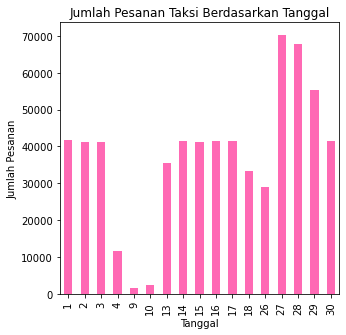

In [11]:
#plot jumlah pesanan taksi berdasarkan tanggal

df_day = df.pivot_table(
    index='day',
    values='id',
    aggfunc='count'
)
df_day.rename(columns={'id':'cab order count'}, inplace=True)
df_day.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Tanggal')
plt.show()

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa ada beberapa data tanggal yang kosong seperti pada tanggal 5-8, 11-12, dan 19-25.

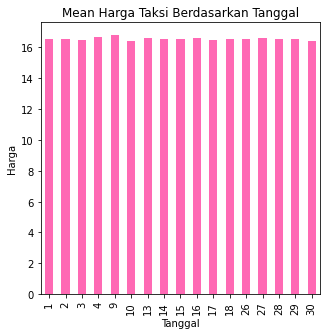

In [12]:
df_day = df.pivot_table(
    index='day',
    values='price',
    aggfunc=np.mean
)
df_day.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Mean Harga Taksi Berdasarkan Tanggal')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show()

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa mean harga taksi berdasarkan tanggal hampir bernilai sama diatas 16.

In [13]:
df_day = df.groupby(['day'])['price']
df_day.describe()['std']

day
1     9.352676
2     9.353373
3     9.242551
4     9.414552
9     9.252346
10    9.110735
13    9.293587
14    9.302670
15    9.309548
16    9.326386
17    9.345715
18    9.410368
26    9.271219
27    9.366719
28    9.328955
29    9.294890
30    9.304620
Name: std, dtype: float64

**interpretasi:**

berdasarkan output diatas, terlihat bahwa standar deviasi dari harga taksi berdasarkan tanggal hampir bernilai sama diatas 9.

### Berdasarkan Jam

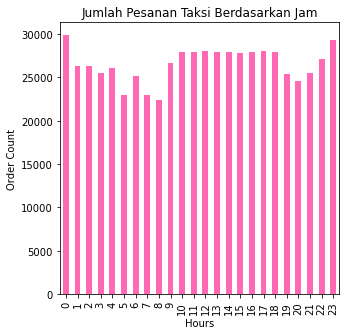

In [14]:
df_hour = df.pivot_table(
    index='hour',
    values='id',
    aggfunc='count'
)
df_hour.rename(columns={'id':'cab order count'}, inplace=True)
df_hour.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Jam')
plt.ylabel('Order Count')
plt.xlabel('Hours')
plt.show()

**interpretasi:**

Dari histogram tersebut dapat dilihat waktu penggunaan taxi online ramai pada pukul 23.00 hingga 01.00 dan permintaan taxi online tidak terlalu tinggi pada pagi hari di pukul 04.00 - 08.00 kemudian mulai meningkat dipukul 09.00 hingga 18.00

## Analisis Sumber - Destinasi

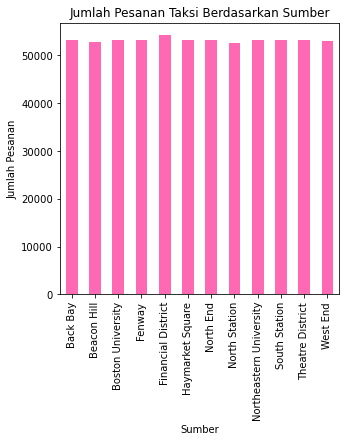

In [15]:
df_source = df.pivot_table(
    index='source',
    values='id',
    aggfunc='count'
)

df_source.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Sumber')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Sumber')
plt.show()


**interpretasi:**

berdasarkan plot diatas, terlihat bahwa jumlah pesanan taksi berdasarkan sumber hampir memiliki jumlah yang sama diatas 50.000 dan yang tertinggi adalah dari Financial District.

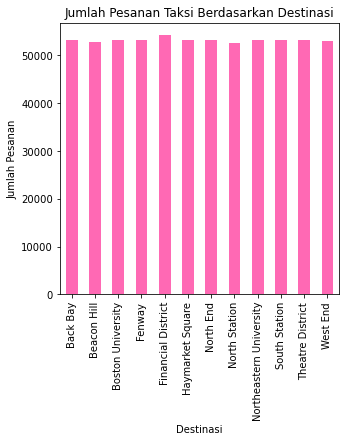

In [16]:
df_destinasi = df.pivot_table(
    index='source',
    values='id',
    aggfunc='count'
)

df_destinasi.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Destinasi')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Destinasi')
plt.show()

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa jumlah pesanan taksi berdasarkan destinasi hampir memiliki jumlah yang sama diatas 50.000 dan yang tertinggi adalah dari Financial District.

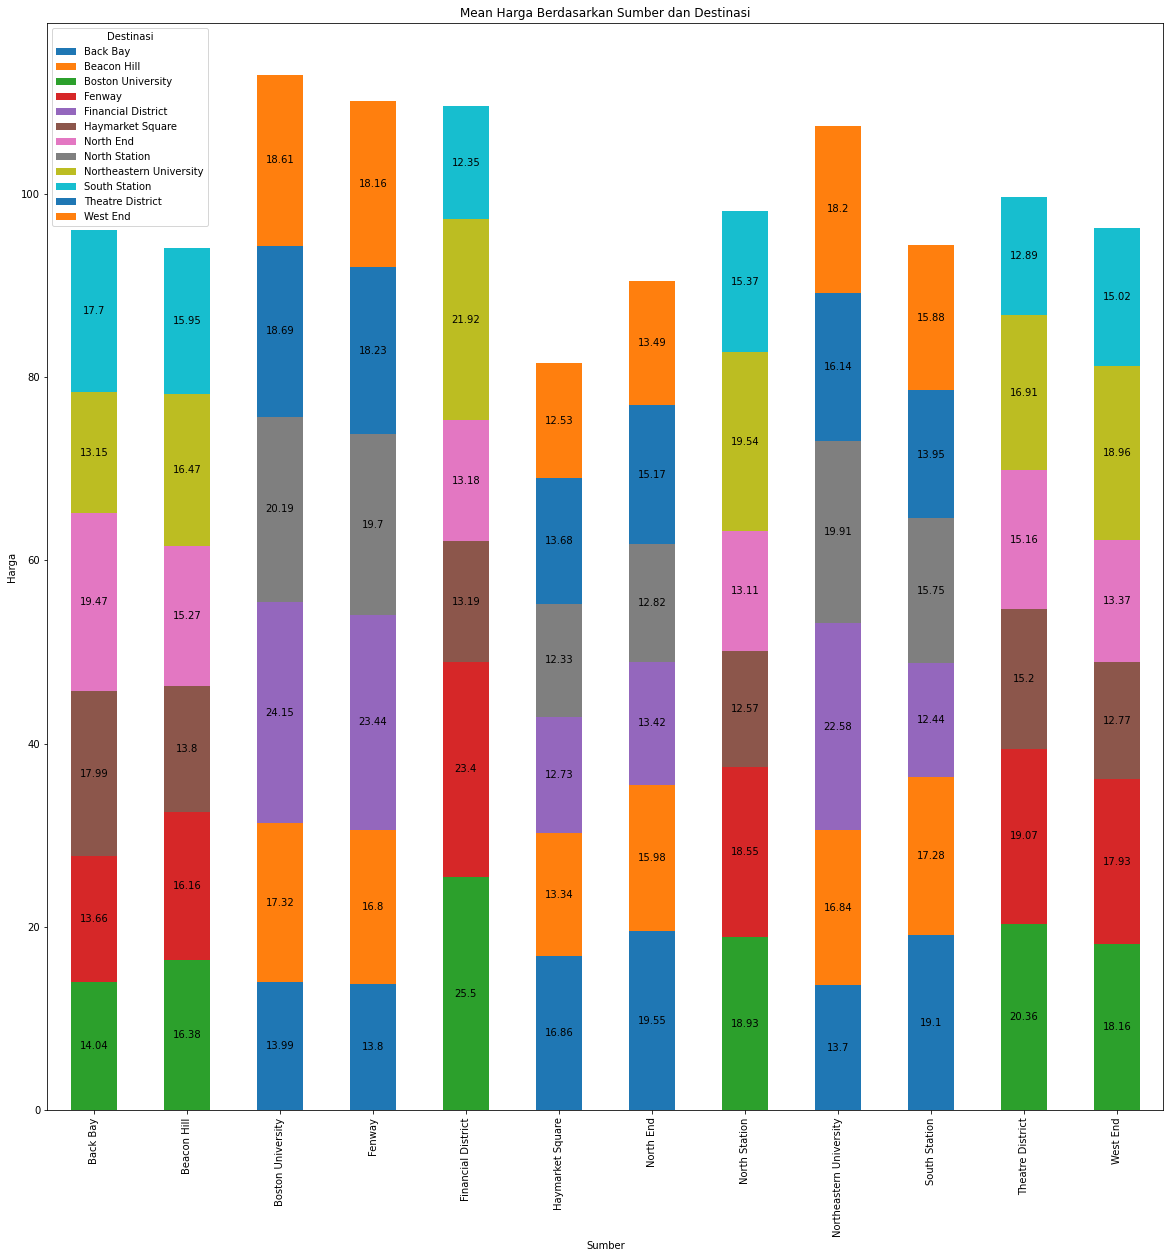

In [17]:
df_mix = df.pivot_table(
    index='source',
    columns='destination',
    values='price',
    aggfunc=np.mean
)

plot = df_mix.plot(kind='bar', stacked=True, figsize=(20, 20))
plt.legend(title='Destinasi')
plt.title('Mean Harga Berdasarkan Sumber dan Destinasi')
plt.ylabel('Harga')
plt.xlabel('Sumber')
for mean in plot.containers:
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')
    
plt.show()

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa harga memiliki mean yang berbeda-beda berdasarkan sumberr dan destinasi. jadi, terdapat kemungkinan harga terpengaruhi oleh hal tersebut.

## Analisis Tipe Taksi 

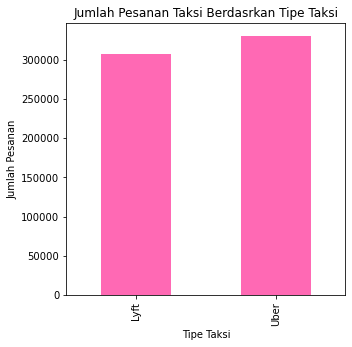

In [18]:
df_type = df.pivot_table(
    index='cab_type',
    values='id',
    aggfunc='count'
)

df_type.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasrkan Tipe Taksi')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Tipe Taksi')
plt.show()

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa jumlah pesanan taksi berdasarkan tipe taksi yang tertinggi ada pada tipe Uber.

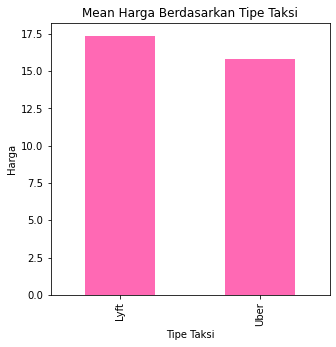

In [19]:
df_mtype = df.pivot_table(
    index='cab_type',
    values='price',
    aggfunc='mean'
)

df_mtype.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Mean Harga Berdasarkan Tipe Taksi')
plt.ylabel('Harga')
plt.xlabel('Tipe Taksi')
plt.show()

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa mean harga taksi berdasarkan tipe taksi tertinggi ada pada tipe Lyft sedangkan Uber memiliki mean harga taksi terendah.

In [20]:
df_mixtype = df.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df_mixtype , x="hour", y="counts", color="cab_type", barmode="group")
fig3.update_layout(title="Waktu Pemesanan Berdasarkan Tipe Taksi", title_x=0.5)

**interpretasi:**

berdasarkan plot diatas, terlihat bahwa setiap hari yang memiliki banyak pesanan ada pada tipe Uber.

## Analisis Tipe Kendaraan

In [21]:
df_ubertype = df.pivot_table(
    index='name',
    values='price',
    aggfunc='mean'
)

df_ubertype

,price
name,
Black,20.523786
Black SUV,30.286763
Lux,17.771240
Lux Black,23.062468
Lux Black XL,32.324086
Lyft,9.610885
Lyft XL,15.309363
Shared,6.029893
UberPool,8.752500


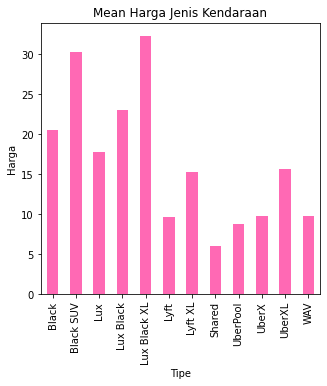

In [22]:
df_ubertype.plot(kind='bar', color='hotpink', figsize=(5, 5), legend=None)
plt.title('Mean Harga Jenis Kendaraan')
plt.ylabel('Harga')
plt.xlabel('Tipe')
plt.show()

**interpretasi:**

berdasarkan tabel dan plot diatas, terlihat bahwa jenis kendaraan dengan mean harga tertinggi ada pada tipe Lux Black XL sebesar $32.324086.

## Analisis Cuaca
sebelum melakukan analisis cuaca, perlu dilakukan cleaning data terlebih dahulu. kolom short summary di rename menjadi weather untuk memudahkan penulisan

In [23]:
df.rename(columns={'short_summary':'weather'}, inplace=True)

In [24]:
df['weather'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

dapat dilihat, kolom weather memiliki 9 fitur

In [25]:
#  menampilkan jumlah penumpang berdasarkan weather
df_weather=pd.DataFrame(df.groupby(['weather'])['weather'].value_counts())
df_weather=df_weather.rename(columns={'weather':'value'})
df_weather.reset_index(drop=True,inplace=True)
df_weather['weather']=['clear','Drizzle','Foggy','Light Rain','Mostly Cloudy',
                      'Overcast','Partly Cloudy','Possible Drizzle','Rain']
df_weather=df_weather.set_index('weather')
df_weather

,value
weather,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


In [26]:
df_weather_cab=pd.DataFrame(df.groupby(['weather'])['cab_type'].value_counts())
df_weather_cab=df_weather_cab.rename(columns={'cab_type':'value'})
df_weather_cab

value
weather            cab_type        
 Clear             Uber       41603
                   Lyft       38653
 Drizzle           Uber        3614
                   Lyft        3111
 Foggy             Uber        4290
                   Lyft        4002
 Light Rain        Uber       26160
                   Lyft       24328
 Mostly Cloudy     Uber       69883
                   Lyft       64720
 Overcast          Uber      104013
                   Lyft       97416
 Partly Cloudy     Uber       60563
                   Lyft       56663
 Possible Drizzle  Uber        9104
                   Lyft        8072
 Rain              Uber       11338
                   Lyft       10443

dari tabel ini terlihat bahwa pemesanan paling banyak dilakukan ketika cuaca mendung dan paling sedikit saat gerimis

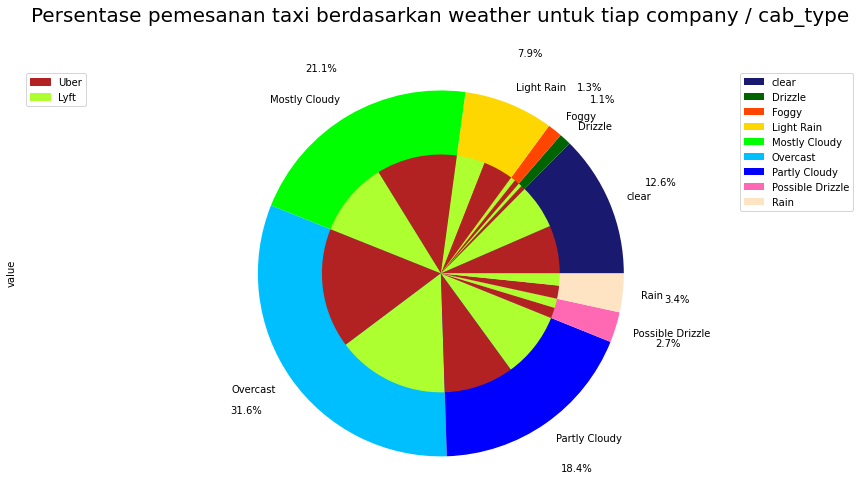

In [50]:
# visualisasi fitur weather untuk setiap cab_type menggunakan pie chart
bg = plt.axes()
colors = ['midnightblue', 'darkgreen', 'orangered', 'gold', 'lime', 'deepskyblue', 'blue', 'hotpink', 'bisque']
colors2 = ['firebrick', 'greenyellow']
df_weather['value'].plot(kind='pie', colors=colors, label=None, figsize=(15,7.5), autopct='%1.1f%%', pctdistance=1.3)
df_weather_cab['value'].plot(kind='pie', radius=0.65,colors=colors2,
                            labels=None)
plt.title('Persentase pemesanan taxi berdasarkan weather untuk tiap company / cab_type', fontsize=20, y=1.1)
leg1=plt.legend(labels=df_weather.index)
ax=plt.gca().add_artist(leg1)
patch_uber=mpatches.Patch(color='firebrick',label='Uber')
patch_lyft=mpatches.Patch(color='greenyellow', label='Lyft')
leg2=plt.legend(handles=[patch_uber,patch_lyft],loc='upper left')
plt.axis('equal')
plt.show(bg.set_facecolor("white"))
                            


> dari pie chart tampak lebih jelas bahwa kenaikan penumpang terbesar terjadi ketika cuaca mendung dan terkcil ketika gerimis

 > Terdapat beberapa kemungkinan dalam hal ini seperti cuaca pada bulan 11 dan 12 jarang hujan, penumpang memiliki alternatif kendaraan lain saat sedang hujan, atau penumpang memilih tidak bepergian saat sedang hujan, serta berbagai kemungkinan lain yang perlu dianalisa lebih lanjut dengan data dari sumber lain.

# Correlation

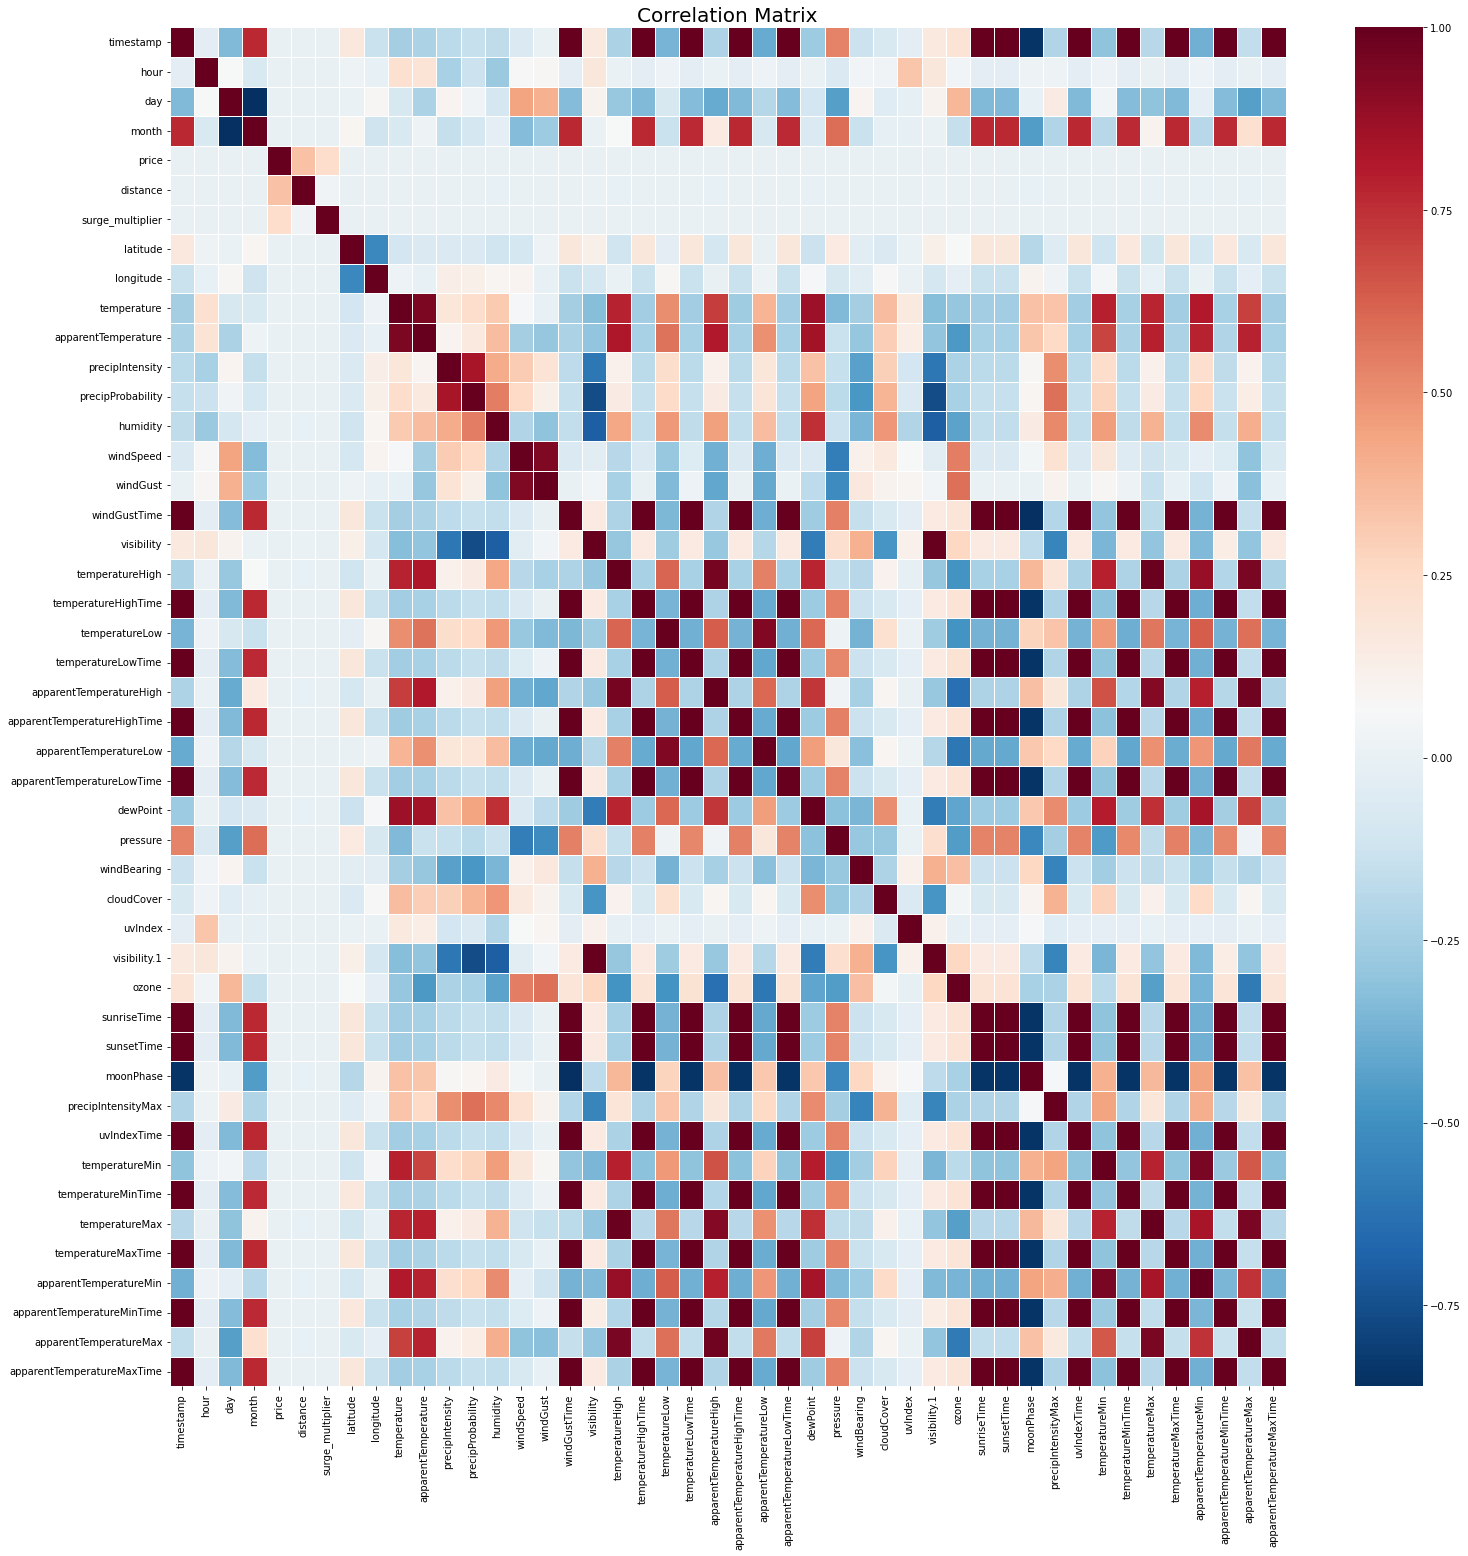

In [28]:
num_col_list = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].to_list()
plt.figure(figsize = (25,25))
sns.heatmap(df[num_col_list].corr(), cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

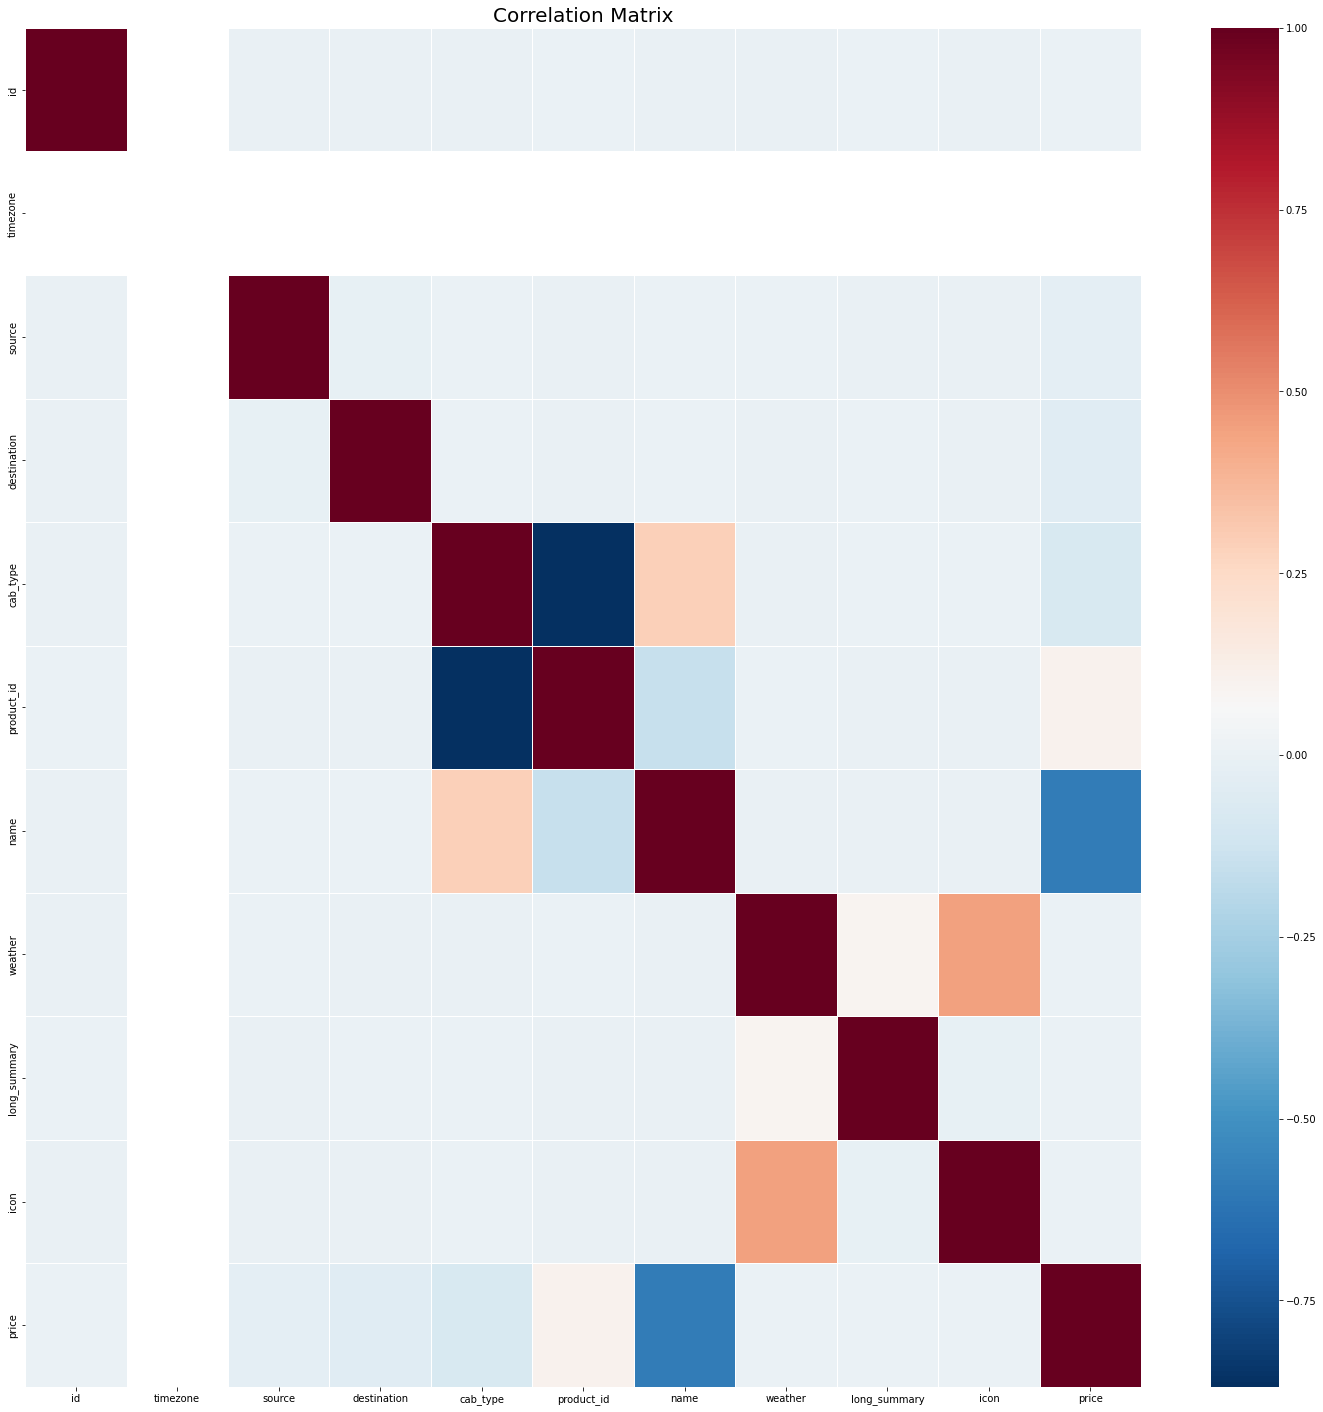

In [29]:
df_temp = df.copy()
cat_col_list = df_temp.columns[(df_temp.dtypes == 'object')].to_list()
for col in cat_col_list:
    df_temp[col] = preprocessing.LabelEncoder().fit_transform(df_temp[col])
plt.figure(figsize = (25,25))
cat_col_list.append('price')
sns.heatmap(df_temp[cat_col_list].corr(), cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [30]:
#melihat nilai korelasi setiap kolom
df_temp.corr()['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
product_id                     0.102679
icon                           0.002100
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
weather                        0.001245
windGust                       0.001218
id                             0.001137
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760


**interpretasi:**

berdasarkan korelasi tersebut, terlihat bahwa kolom yang paling berpengaruh terhadap harga adalah:

1. distance dengan korelasi 0.345061
2. surge_multiplier dengan korelasi 0.240458
3. product_id dengan korelasi 0.102679
4. cab_type dengan korelasi -0.083385
5. name dengan korelasi -0.586644

# Pre-processing

Dari hasil korelasi sebelumnya, akan digunakan 5 kolom yaitu surge_multiplier, distance, product_id, cab_type, dan name. karena 5 kolom tersebut yang paling berpengaruh terhadap harga.

In [31]:
#memilih kolom yang akan digunakan

df_fix = df[['cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier']]
df_fix.head()

,cab_type,product_id,name,price,distance,surge_multiplier
0,Lyft,lyft_line,Shared,5.0,0.44,1.0
1,Lyft,lyft_premier,Lux,11.0,0.44,1.0
2,Lyft,lyft,Lyft,7.0,0.44,1.0
3,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0
4,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0


In [32]:
#encode data menjadi numerik

label = LabelEncoder()
df_fix['cab_type'] = label.fit_transform(df_fix['cab_type'])
df_fix['product_id'] = label.fit_transform(df_fix['product_id'])
df_fix['name'] = label.fit_transform(df_fix['name'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3162256191.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3162256191.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3162256191.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [33]:
df_fix.head()

,cab_type,product_id,name,price,distance,surge_multiplier
0,0,7,7,5.0,0.44,1.0
1,0,11,2,11.0,0.44,1.0
2,0,6,5,7.0,0.44,1.0
3,0,9,4,26.0,0.44,1.0
4,0,10,6,9.0,0.44,1.0


# Variabel Dummy

In [34]:
X = df[['cab_type', 'product_id', 'name', 'distance', 'surge_multiplier']]
y = df['price']

In [35]:
X = pd.get_dummies(X)
X.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Split Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Linear Regression

In [37]:
#menentukan model klasifikasi
model = LinearRegression()

#training model
model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

In [38]:
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['predicted_price'] = y_pred
df_test.head(10)

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,predicted_price
526491,4.51,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.514160
506474,2.80,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11.483398
139551,1.09,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.854492
235222,0.92,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,16.946289
140436,1.12,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,19.385498
62314,5.56,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19.200195
192444,3.40,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,18.009277
309129,0.73,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,13.042480
33575,2.45,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.511719
87489,2.80,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31.970703


In [39]:
print("Accuracy Score:", str(model.score(X_test, y_test)))
print("Mean Squared Error:", str(mean_squared_error(y_test, y_pred)))

Accuracy Score: 0.9273892491435014
Mean Squared Error: 6.3302359448484635


**interpretasi:**

berdasarkan output diatas, terlihat bahwa model linear regression memiliki akurasi sebesar 56.2% dengan MSE 194 yang berarti model dapat menebak dengan benar harga jasa transportasi sebesar 56.2% kemungkinan.

# Model Inference

In [40]:
import pickle

In [41]:
#simpan model training sebabgai file pickle
save_model = pickle.dumps(model)

#load pickle model
model_from_pickle = pickle.loads(save_model)

#gunakan load pickle model utk membuat prediksi
model_from_pickle.predict(X_test)

array([12.51416016, 11.48339844,  5.85449219, ..., 18.56787109,
        8.16894531, 11.66357422])

In [42]:
import joblib

#simpan model sbg file pickle
joblib.dump(model, 'linear_regression.pkl')

#load model dari file
model_from_joblib = joblib.load('linear_regression.pkl')

#gunakan load model utk membuat prediksi
model_from_joblib.predict(X_test)

array([12.51416016, 11.48339844,  5.85449219, ..., 18.56787109,
        8.16894531, 11.66357422])